<a href="https://colab.research.google.com/github/Pranjita1/clustering---kmeans/blob/master/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('Wholesale customers data.csv')
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [0]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

Notice that the scale of each column is very different from each other. So, as a preprocessing we apply normalization.

In [4]:
from sklearn.preprocessing import normalize

df_scaled = normalize(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Next, we plot the dendogram and see the clusters for this table

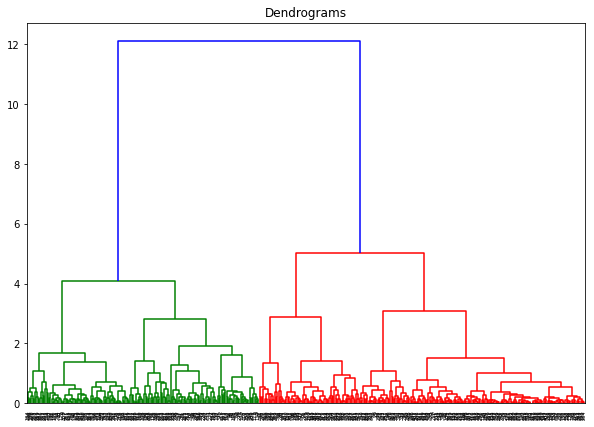

In [7]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  

plt.title("Dendrograms")  

#dend = shc.dendrogram(shc.linkage(df_scaled, method='single', optimal_ordering=False))
# the figure obtained by this method was difficult to interpret. So, trying another method

dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

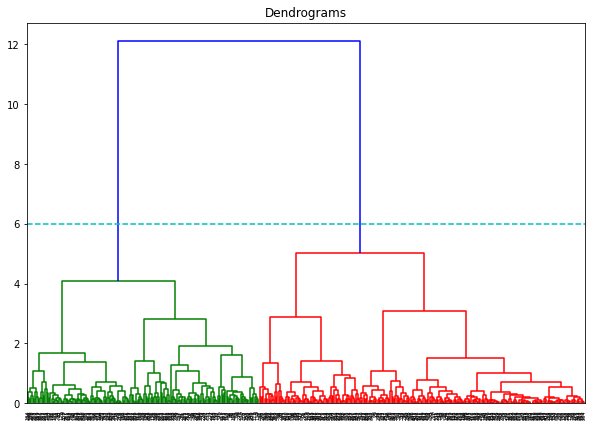

In [10]:
plt.figure(figsize=(10, 7))  

plt.title("Dendrograms")  

dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

plt.axhline(y=6, color='c', linestyle='dashed')

At y=6, we found the max distance so we decided to split the dendogram there into two clusters. So, using this unsupervised method, we can say that our customer dataset has two clusters of customers. Now, we try to predict the cluster of each cuatomer and finally visualize the two clusters.

In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

cluster.fit_predict(df_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

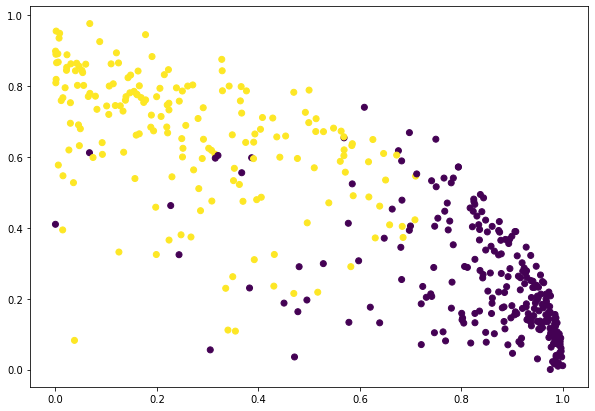

In [14]:
plt.figure(figsize=(10, 7))  

plt.scatter(df_scaled['Fresh'], df_scaled['Grocery'], c=cluster.labels_) 

In [0]:
df_scaled_new = df_scaled[['Fresh', 'Grocery']]

In [0]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(df_scaled_new)

In [0]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

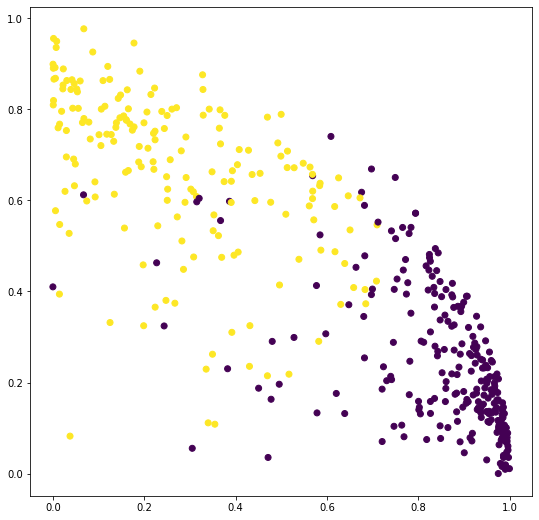

In [39]:
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
cvec = [colours[label] for label in labels] 

plt.figure(figsize =(9, 9)) 
plt.scatter(df_scaled_new.Fresh, df_scaled_new.Grocery, c = cluster.labels_) 
  